<a href="https://colab.research.google.com/github/hlin863/Image-Generation/blob/image_frame_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

Load Hugging Face Token

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

In [4]:
# Correct file path and case sensitivity
with open('/content/drive/MyDrive/HF_Token.txt', 'r') as file:
    hf_token = file.read().strip()

In [5]:
os.environ['HF_TOKEN'] = hf_token
print("Token loaded successfully!")

Token loaded successfully!


Model Generation

In [6]:
from IPython.display import Image, display

In [7]:
output_path = "/content/drive/My Drive/Generated_Images/generated_image.png"

In [8]:
def generate_image_from_prompt(prompt):
    # Load the pre-trained Stable Diffusion model
    model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")  # Use GPU for faster generation

    # Generate the image from the prompt
    with torch.no_grad():
        image = pipe(prompt).images[0]

    # Save the image to the specified path
    image.save(output_path)

    # Display the saved image in Colab
    display(Image(output_path))

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

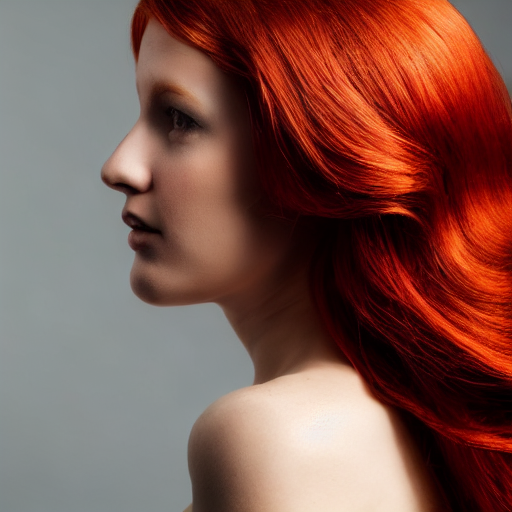

In [10]:
# Example usage
generate_image_from_prompt("A realistic portrait of a young beautiful real life red hair woman with natural light")